# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("szrlee/stock-time-series-20050101-to-20171231")

print("Path to dataset files:", path)

100%|██████████| 3.03M/3.03M [00:00<00:00, 33.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/szrlee/stock-time-series-20050101-to-20171231/versions/3


In [ ]:
!ls /root/.cache/kagglehub/datasets/szrlee/stock-time-series-20050101-to-20171231/versions/3

AABA_2006-01-01_to_2018-01-01.csv	 JNJ_2006-01-01_to_2018-01-01.csv
AAPL_2006-01-01_to_2018-01-01.csv	 JPM_2006-01-01_to_2018-01-01.csv
all_stocks_2006-01-01_to_2018-01-01.csv  KO_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv  MCD_2006-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv	 MMM_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv	 MRK_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv		 MSFT_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv	 NKE_2006-01-01_to_2018-01-01.csv
CSCO_2006-01-01_to_2018-01-01.csv	 PFE_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv	 PG_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv	 TRV_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv		 UNH_2006-01-01_to_2018-01-01.csv
GOOGL_2006-01-01_to_2018-01-01.csv	 UTX_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv		 VZ_2006-01-01_to_2018-01-01.csv
HD_2006-01-01_to_2018-01-01.csv		 WMT_2006-0

In [ ]:
import pandas as pd
with open(path + '/IBM_2006-01-01_to_2018-01-01.csv',"rt") as f:
  lines = f.readlines()

data = [line.strip().split(",") for line in lines]

df = pd.DataFrame(data[1:], columns = data[0])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Close'] = pd.to_numeric(df['Close'])
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM
2,2006-01-05,81.4,82.9,81.0,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.1,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...,...
3015,2017-12-22,151.82,153.0,151.5,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.5,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.2,154.12,153.2,154.04,2687624,IBM


## Subtask 1

Load data and prepare the dataset

In [ ]:
import pandas as pd

data = pd.read_csv("/content/IBM_2006-01-01_to_2018-01-01.csv")
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...,...
3015,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM


Text(0, 0.5, 'Close')

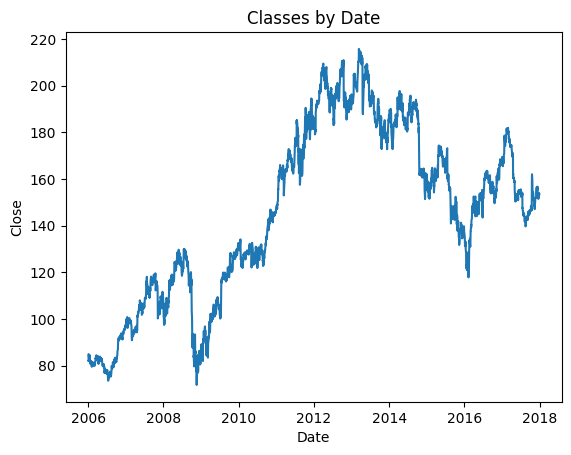

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = df['Date']
y = df['Close']
plt.plot(df.Date, df.Close)

# Giving title to the chart using plt.title
plt.title('Classes by Date')

# rotating the x-axis tick labels at 30degree
# towards right
#plt.xticks(rotation=30, ha='right')

# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Close')

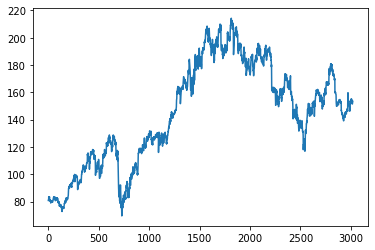

# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 9.8954e-04 - loss: 0.0088 - val_accuracy: 0.0000e+00 - val_loss: 7.9820e-04
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 7.7302e-04 - loss: 8.9229e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.6018e-04
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 8.5831e-04 - loss: 7.4281e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.9964e-04
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 9.2532e-04 - loss: 6.9651e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6552e-04
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 4.6976e-04 - loss: 8.5780e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6711e-04
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 8.0409e-04 - loss: 7.2331e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 2.6708e-04 - loss: 6.1249e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.0031e-04
Epoch 8/10
74/74 ━━━━━━━━

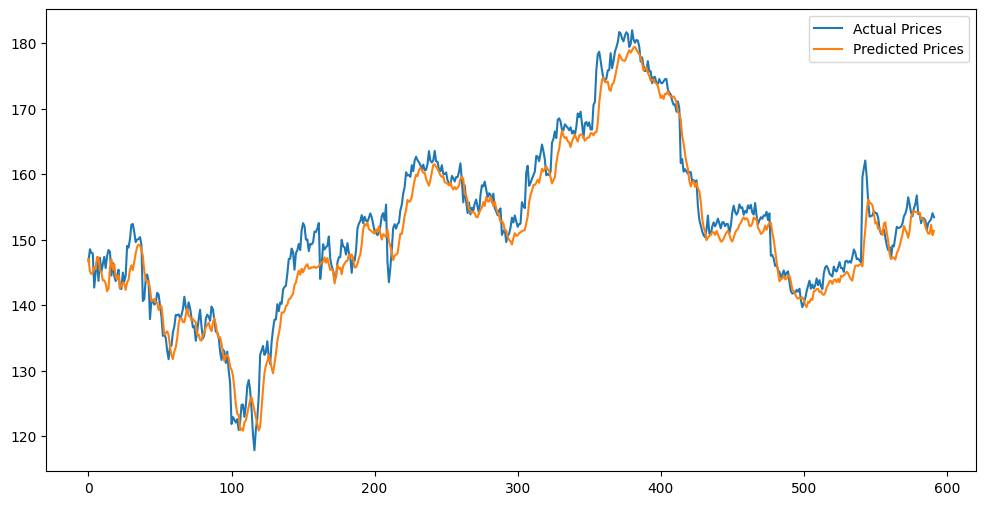

RMSE: 3.0111


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df1 = df[["Date","Close"]]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df1['Close'].values.reshape(-1,1))

def create_dataset(data, window_size = 60):
  X, y = [], []
  for i in range(window_size,len(data)):
    X.append(data[i-window_size:i,0])  # X is the window of past data
    y.append(data[i,0])   # y is the current 'Close' value
  return np.array(X), np.array(y)

window_size = 60

X, y  = create_dataset(scaled_data,window_size)

X = np.reshape(X,(X.shape[0],X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=(X_train.shape[1])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Invert scaling for actual and predicted values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = scaler.inverse_transform(y_pred)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices')
plt.plot(y_pred_scaled, label='Predicted Prices')
plt.legend()
plt.show()

# Calculate RMSE
rmse_fnn = np.sqrt(np.mean((y_test_scaled - y_pred_scaled) ** 2))
print(f"RMSE: {rmse_fnn:.4f}")

## Subtask 3

Perform prediction by using RNN

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.0011 - loss: 0.0609 - val_accuracy: 0.0000e+00 - val_loss: 4.7623e-04
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.0011 - loss: 9.8235e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.5576e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 7.9931e-04 - loss: 5.4280e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.2625e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 4.3680e-04 - loss: 5.9261e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.5082e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.0012 - loss: 5.5741e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.4759e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 6.1889e-04 - loss: 4.3638e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.4383e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 2.1400e-04 - loss: 4.5604e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.3844e-04
Epoch 8/10
79/79 ━━━━━━━━

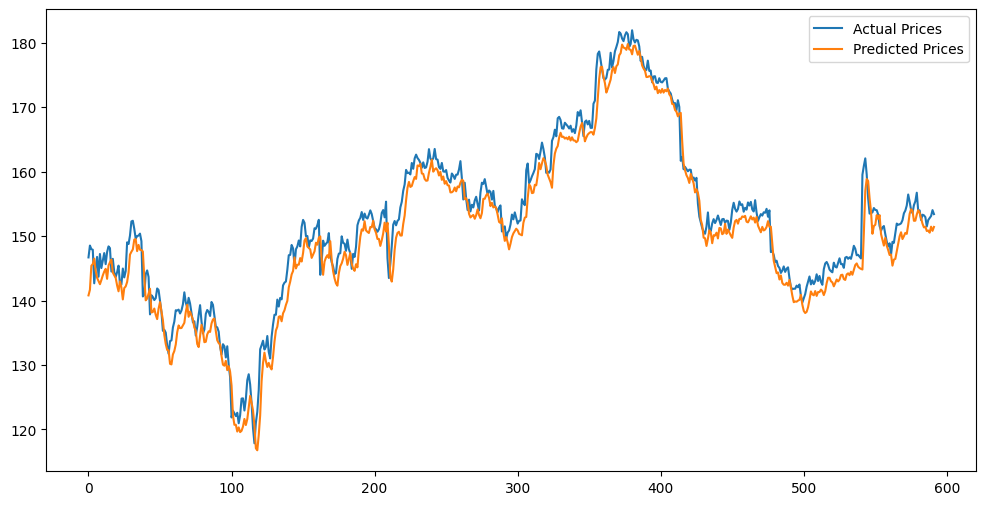

RMSE: 2.8663


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

df2 = df[["Date","Close"]]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df2['Close'].values.reshape(-1,1))

def create_dataset(data, window_size=60):
  X,y = [], []
  for i in range(window_size,len(data)):
    X.append(data[i-window_size:i,0])
    y.append(data[i,0])
  return np.array(X),np.array(y)

window_size = 60
X , y = create_dataset(scaled_data, window_size)

X = np.reshape(X,(X.shape[0],X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=64, return_sequences=False))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs =10,batch_size = 30,validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices')
plt.plot(y_pred_scaled, label='Predicted Prices')
plt.legend()
plt.show()

# Calculate RMSE
rmse_rnn = np.sqrt(np.mean((y_test_scaled - y_pred_scaled) ** 2))
print(f"RMSE: {rmse_rnn:.4f}")

## Subtask 4

Perform prediction by using LSTM

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 1.4449e-04 - loss: 0.0688 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 2/3
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 4.3836e-04 - loss: 8.8274e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.9824e-04
Epoch 3/3
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 4.5089e-04 - loss: 8.9486e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.4624e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


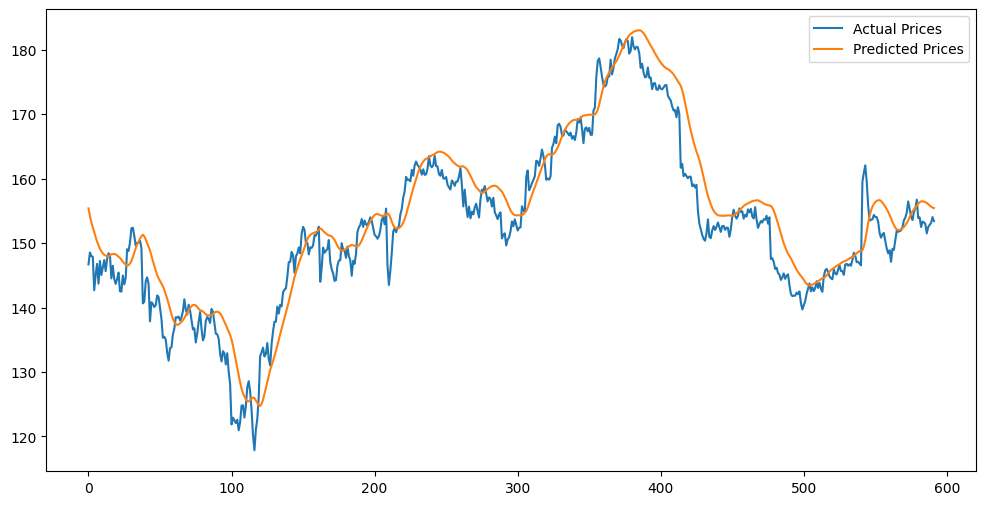

RMSE: 4.1907


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

df3 = df[["Date","Close"]]

scalr = MinMaxScaler(feature_range=(0,1))
scal_data = scalr.fit_transform(df3['Close'].values.reshape(-1,1))

def cre_data(data, window_size=60):
  X,y =[],[]
  for i in range(window_size, len(data)):
      X.append(data[i-window_size:i, 0])
      y.append(data[i,0])
  return np.array(X), np.array(y)

wind_size = 60
X , y  = cre_data(scal_data,wind_size)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Invert scaling for actual and predicted values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = scaler.inverse_transform(y_pred)

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices')
plt.plot(y_pred_scaled, label='Predicted Prices')
plt.legend()
plt.show()

# Calculate RMSE
rmse_lstm = np.sqrt(np.mean((y_test_scaled - y_pred_scaled) ** 2))
print(f"RMSE: {rmse_lstm:.4f}")

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

In [ ]:
best_model = min([("LSTM", rmse_lstm), ("RNN", rmse_rnn), ("FFN", rmse_fnn)], key=lambda x: x[1])
print(f"\nBest model: {best_model[0]} with RMSE: {best_model[1]:.4f}")


Best model: RNN with MSE: 2.8663
